<a href="https://colab.research.google.com/github/JanePer/AI---PORTFOLIO/blob/main/Task13_(Pro)_%D0%93%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_%D0%B4%D0%BB%D1%8F_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as random
import time
from PIL import Image
from google.colab import files
%matplotlib inline

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, concatenate, Input, Reshape
from tensorflow.keras import utils
from tensorflow.keras.losses import MAE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import keras.backend as K
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.preprocessing import image
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(np.unique(y_train))

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[0 1 2 3 4 5 6 7 8 9]


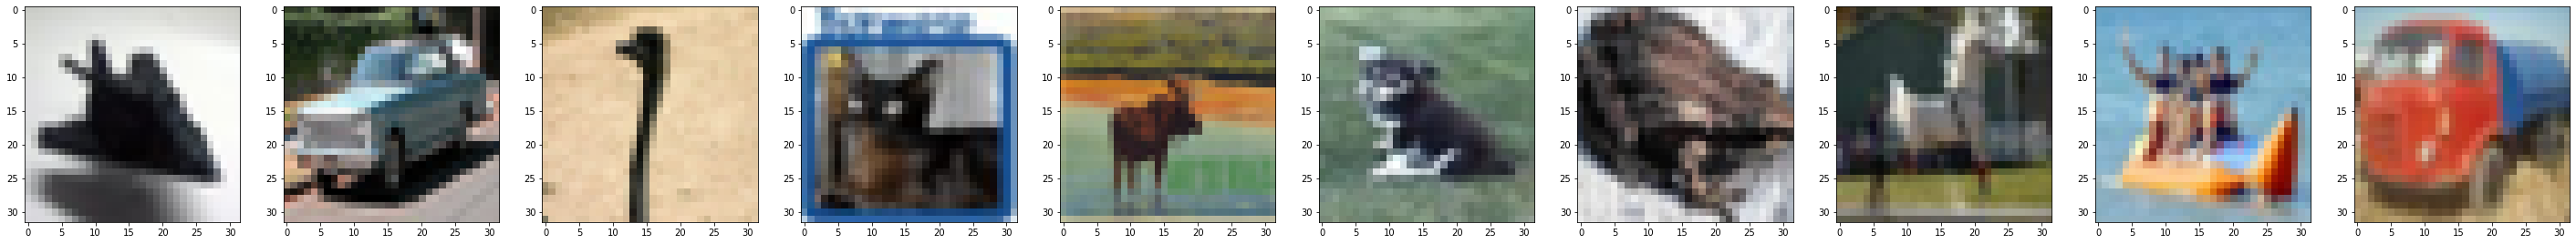

In [ ]:
fig, axs=plt.subplots(1,10,figsize=(50,5))
i=0
for j in range(50000):
  if y_train[j]==i and i<10:
    pic=x_train[j]
    axs[i].imshow(Image.fromarray(pic).convert('RGB'))
    i=i+1
plt.show()

In [ ]:
y_train=utils.to_categorical(y_train,10)
y_test=utils.to_categorical(y_test,10)
x_train=x_train/255
x_test=x_test/255
img_width=x_train.shape[1]
img_height=x_train.shape[2]
channels=x_train.shape[3]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(img_width, img_height, channels)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)
32 32 3


In [ ]:
model=Sequential()
model.add(BatchNormalization(input_shape=(img_width, img_height, channels)))
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 512)       14336     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 512)       0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 512)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 512)       2048      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 1024)      4719616   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 1024)        0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
n_train=1000
n_test=200
history_sample=model.fit(x_train[:n_train],y_train[:n_train], batch_size=10, epochs=50, validation_data=(x_test[:n_test], y_test[:n_test]), verbose=1)

Epoch 1/50
100/100 [==============================] - 35s 37ms/step - loss: 2.1698 - accuracy: 0.2600 - val_loss: 3.6260 - val_accuracy: 0.0750
Epoch 2/50
100/100 [==============================] - 3s 34ms/step - loss: 1.6845 - accuracy: 0.4190 - val_loss: 4.3506 - val_accuracy: 0.1150
Epoch 3/50
100/100 [==============================] - 3s 35ms/step - loss: 1.4177 - accuracy: 0.5020 - val_loss: 5.2633 - val_accuracy: 0.0750
Epoch 4/50
100/100 [==============================] - 3s 35ms/step - loss: 1.2408 - accuracy: 0.5620 - val_loss: 3.1702 - val_accuracy: 0.1900
Epoch 5/50
100/100 [==============================] - 4s 36ms/step - loss: 1.0382 - accuracy: 0.6380 - val_loss: 2.7184 - val_accuracy: 0.2500
Epoch 6/50
100/100 [==============================] - 4s 36ms/step - loss: 0.8510 - accuracy: 0.7040 - val_loss: 2.3980 - val_accuracy: 0.3300
Epoch 7/50
100/100 [==============================] - 4s 36ms/step - loss: 0.7434 - accuracy: 0.7280 - val_loss: 2.1494 - val_accuracy: 0.405

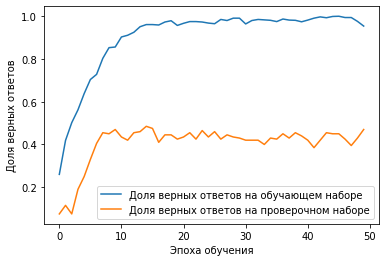

In [ ]:
#Оображаем график точности обучения
plt.plot(history_sample.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_sample.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model=Sequential()
model.add(BatchNormalization(input_shape=(img_width, img_height, channels)))
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
history=model.fit(x_train,y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
391/391 [==============================] - 58s 145ms/step - loss: 1.4013 - accuracy: 0.5022 - val_loss: 7.8234 - val_accuracy: 0.1128
Epoch 2/50
391/391 [==============================] - 54s 137ms/step - loss: 1.0337 - accuracy: 0.6352 - val_loss: 1.2019 - val_accuracy: 0.6057
Epoch 3/50
391/391 [==============================] - 54s 137ms/step - loss: 0.8776 - accuracy: 0.6928 - val_loss: 0.8991 - val_accuracy: 0.6937
Epoch 4/50
391/391 [==============================] - 53s 137ms/step - loss: 0.7649 - accuracy: 0.7321 - val_loss: 0.8316 - val_accuracy: 0.7174
Epoch 5/50
391/391 [==============================] - 53s 136ms/step - loss: 0.6718 - accuracy: 0.7640 - val_loss: 0.7894 - val_accuracy: 0.7359
Epoch 6/50
391/391 [==============================] - 53s 137ms/step - loss: 0.5966 - accuracy: 0.7903 - val_loss: 0.8212 - val_accuracy: 0.7282
Epoch 7/50
391/391 [==============================] - 53s 136ms/step - loss: 0.5228 - accuracy: 0.8156 - val_loss: 0.7009 - val_ac

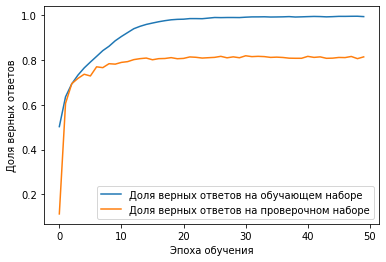

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

##Conv2d=1 and Dense=1

In [ ]:
#задаем количество Conv2d слоев до Flatten и количество Dense слоев после Flatten
numberConv2dLayers=1
numberDenseLayers=1

In [ ]:
#Функция создания списка случайных параметров
activation_list = ['linear','relu','LeakyReLU','elu','sigmoid'] 
layers_list = ['','MaxPooling2D', 'AveragePooling2D', 'BatchNormalization', 'Dropout']
def createRandomNet():
  net_total=[]
  net_total.append(random.randint(0,1)) #Делаем или нет входную нормализацию
  for i in range(numberConv2dLayers):
    net=[]
    net.append(random.randint(8,10)) #Conv2D слой от 256 до 1,024 нейронов
    net.append(random.randint(2,10)) #Ядро Conv2D слоя от 2 до 10
    net.append(random.randint(0,4))  # Функция активации Conv2D слоя
    net.append(random.randint(0,4))  #какой первый слой после Conv2D
    net.append(random.randint(2,4))  #Размер MaxPooling
    net.append(random.randint(2,4))  #Размер AveragePooling
    net.append(random.randint(5,60)) #Размер Dropout
    net.append(random.randint(0,4))  #какой второй слой после Conv2D
    net.append(random.randint(2,4))  #Размер MaxPooling
    net.append(random.randint(2,4))  #Размер AveragePooling
    net.append(random.randint(5,60)) #Размер Dropout
    net.append(random.randint(0,4))  #какой третий слой после Conv2D
    net.append(random.randint(2,4))  #Размер MaxPooling
    net.append(random.randint(2,4))  #Размер AveragePooling
    net.append(random.randint(5,60)) #Размер Dropout
    net.append(random.randint(0,4))  #какой четвертый слой после Conv2D
    net.append(random.randint(2,4))  #Размер MaxPooling
    net.append(random.randint(2,4))  #Размер AveragePooling
    net.append(random.randint(5,60)) #Размер Dropout
    net_total+=net
  for i in range(numberDenseLayers):
    net=[]
    net.append(random.randint(8,10)) # Размер полносвязного слоя от 256 до 1024 нейронов
    net.append(random.randint(0,4))  # Функция активации dense слоя
    net.append(random.randint(0,1))  #Делаем ли Dropout
    net.append(random.randint(5,60)) #Размер Dropout
    net.append(random.randint(0,1))  #Делаем ли BatchNormalization
    net_total+=net
  #net_total.append(random.randint(0,2)) # Функция активации последнего слоя
  return net_total

In [ ]:
#Создаём сеть (net_total - список параметров)
def createConvNet(net_total):
  model = Sequential()                    # Создаем модель Sequential

  makeFirstNormalization = net_total[0]         # Делаем ли нормализацию в начале
  if makeFirstNormalization: # Если делаем нормализацию в начале
      model.add(BatchNormalization(input_shape=(img_width, img_height, channels)))  # Добавляем слой BatchNormalization
 
  for i in range(numberConv2dLayers):
    ConvSize = 2 ** net_total[1+i*19]      # Размер вёрточного слоя
    ConvKernel = net_total[2+i*19]         # Ядро свёрточного слоя
    activationConv = net_total[3+i*19]     # Функция активации свёрточного слоя
    firstafterConv =  net_total[4+i*19]    # Первый после свёрточного слоя
    maxPoolingSize1 = net_total[5+i*19]    # Размер MaxPooling
    avgPoolingSize1 = net_total[6+i*19]    # Размер AveragePooling
    DropoutSize1 = net_total[7+i*19]/100   # Размер Dropout
    secondafterConv =  net_total[8+i*19]   # Второй после свёрточного слоя
    maxPoolingSize2 = net_total[9+i*19]    # Размер MaxPooling
    avgPoolingSize2 = net_total[10+i*19]   # Размер AveragePooling
    DropoutSize2 = net_total[11+i*19]/100  # Размер Dropout
    thirdafterConv =  net_total[12+i*19]   # Третий после свёрточного слоя
    maxPoolingSize3 = net_total[13+i*19]   # Размер MaxPooling
    avgPoolingSize3 = net_total[14+i*19]   # Размер AveragePooling
    DropoutSize3 = net_total[15+i*19]/100  # Размер Dropout
    forthafterConv =  net_total[16+i*19]   # Четвертый после свёрточного слоя
    maxPoolingSize4 = net_total[17+i*19]   # Размер MaxPooling
    avgPoolingSize4 = net_total[18+i*19]   # Размер AveragePooling
    DropoutSize4 = net_total[19+i*19]/100  # Размер Dropout

    if makeFirstNormalization==0 and i==0: # Если не делаем нормализацию в начале
      model.add(Conv2D(ConvSize, (ConvKernel, ConvKernel), input_shape=(img_width, img_height, channels), activation=activation_list[activationConv], padding='same')) 
    else:
      model.add(Conv2D(ConvSize, (ConvKernel, ConvKernel), activation=activation_list[activationConv], padding='same')) 

    if firstafterConv==1:
      model.add(MaxPooling2D(pool_size=(maxPoolingSize1,maxPoolingSize1), padding='same'))
    elif firstafterConv==2:
      model.add(AveragePooling2D(pool_size=(avgPoolingSize1,avgPoolingSize1), padding='same'))
    elif firstafterConv==3:
      model.add(BatchNormalization())
    elif firstafterConv==4:
      model.add(Dropout(DropoutSize1))

    if secondafterConv==1:
      model.add(MaxPooling2D(pool_size=(maxPoolingSize2,maxPoolingSize2), padding='same'))
    elif secondafterConv==2:
      model.add(AveragePooling2D(pool_size=(avgPoolingSize2,avgPoolingSize2), padding='same'))
    elif secondafterConv==3:
      model.add(BatchNormalization())
    elif secondafterConv==4:
      model.add(Dropout(DropoutSize2))

    if thirdafterConv==1:
      model.add(MaxPooling2D(pool_size=(maxPoolingSize3,maxPoolingSize3), padding='same'))
    elif thirdafterConv==2:
      model.add(AveragePooling2D(pool_size=(avgPoolingSize3,avgPoolingSize3), padding='same'))
    elif thirdafterConv==3:
      model.add(BatchNormalization())
    elif thirdafterConv==4:
      model.add(Dropout(DropoutSize3))

    if forthafterConv==1:
      model.add(MaxPooling2D(pool_size=(maxPoolingSize4,maxPoolingSize4), padding='same'))
    elif forthafterConv==2:
      model.add(AveragePooling2D(pool_size=(avgPoolingSize4,avgPoolingSize4), padding='same'))
    elif forthafterConv==3:
      model.add(BatchNormalization())
    elif forthafterConv==4:
      model.add(Dropout(DropoutSize4))

  model.add(Flatten())
  for i in range(numberDenseLayers):
    denseSize = 2 ** net_total[(19+(numberConv2dLayers-1)*19+1)+i*5]           # Размер полносвязного слоя
    activationDense = net_total[(19+(numberConv2dLayers-1)*19+2)+i*5]          # Функция активации полносвязного слоя
    makeDropout = net_total[(19+(numberConv2dLayers-1)*19+3)+i*5]              # Делаем ли Dropout
    DropoutSizeDense = net_total[(19+(numberConv2dLayers-1)*19+4)+i*5]/100     # Размер Dropout
    makeBatchNormalization = net_total[(19+(numberConv2dLayers-1)*19+5)+i*5]   # Делаем ли BatchNormalization

    model.add(Dense(denseSize, activation=activation_list[activationDense]))
    if makeDropout:
      model.add(Dropout(DropoutSizeDense))
    elif makeBatchNormalization:
      model.add(BatchNormalization())
 
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
#Функция вычисления результата работы сети
n_train=1000
n_test=200
def evaluateNet(net_total, ep, batchsize, verb):
  val=0
  time.time()
  model=createConvNet(net_total)
  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
  history=model.fit(x_train[:n_train],y_train[:n_train], batch_size=batchsize, epochs=ep, validation_data=(x_test[:n_test], y_test[:n_test]), verbose=verb)
  val=history.history['val_accuracy'][-1] # Возвращаем точность на проверочной выборке с последней эпохи
  return val, model

In [ ]:
n=20 # bots population size
nsurv=10
nnew=n-nsurv #qty of children
l=len(createRandomNet()) #bot size
epochs=10
mut=0.05
popul=[]

for i in range(n):
  popul.append(createRandomNet())

for it in range(epochs):
  val=[]
  curr_time=time.time()
  for i in range(n):
    bot=popul[i]
    f, model_sum=evaluateNet(bot, 10, 10, 0)
    val.append(f)

  newpopul=[]
  sval=sorted(val, reverse=1)
  for i in range(nsurv):
    index=val.index(sval[i])
    newpopul.append(popul[index])
  print(it, time.time()-curr_time, " ", sval[:5], newpopul[:5])

  for i in range(nnew):
    indexp1=random.randint(0, nsurv-1)
    indexp2=random.randint(0, nsurv-1)
    botp1=newpopul[indexp1]
    botp2=newpopul[indexp2]
    newbot=[]
    net4Mut=createRandomNet()
    for j in range(l):
      x=0
      pindex=random.random()
      if pindex<0.5:
        x=botp1[j]
      else:
        x=botp2[j]

      if random.random()<mut:
        x=net4Mut[j]

      newbot.append(x)
    newpopul.append(newbot)
  popul=newpopul

0 743.773508310318   [0.4050000011920929, 0.375, 0.3700000047683716, 0.36500000953674316, 0.35499998927116394] [[0, 9, 3, 2, 1, 2, 4, 0.12384063839088255, 4, 3, 4, 0.9093526856260747, 3, 4, 4, 0.7567047982637797, 4, 3, 2, 0.34687107985753174, 10, 4, 1, 0.3778801172087979, 0], [0, 8, 5, 0, 2, 4, 2, 0.8066042969713144, 4, 4, 3, 0.007888076777701314, 4, 3, 4, 0.8530402442961095, 2, 3, 3, 0.7415382790254444, 10, 0, 1, 0.5076482519268612, 1], [0, 9, 7, 1, 2, 2, 4, 0.7039752632569952, 0, 3, 3, 0.18796646230558145, 0, 3, 4, 0.9204627005999159, 4, 2, 2, 0.562443119219912, 9, 0, 0, 0.6491260871440202, 1], [0, 8, 7, 0, 1, 2, 4, 0.9692184061462641, 4, 3, 2, 0.1916246313607204, 0, 4, 4, 0.0335229495466699, 1, 2, 3, 0.11559118885656305, 9, 0, 0, 0.784120997595975, 1], [1, 8, 8, 3, 4, 4, 3, 0.12644393469650472, 1, 3, 3, 0.21923068295915016, 4, 4, 2, 0.645030037948173, 4, 3, 3, 0.20259030015276702, 9, 1, 1, 0.7799343027093993, 1]]
1 400.7883508205414   [0.4350000023841858, 0.42500001192092896, 0.4050

In [ ]:
model_best=createConvNet(popul[0])
model_best.summary()

Model: "sequential_201"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_206 (Conv2D)          (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d_326 (MaxPoolin (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_205 (Bat (None, 8, 8, 256)         1024      
_________________________________________________________________
max_pooling2d_327 (MaxPoolin (None, 4, 4, 256)         0         
_________________________________________________________________
dropout_332 (Dropout)        (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_201 (Flatten)        (None, 4096)              0         
_________________________________________________________________
dense_403 (Dense)            (None, 512)            

In [ ]:
model_best.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
history=model_best.fit(x_train,y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
391/391 [==============================] - 14s 34ms/step - loss: 1.3729 - accuracy: 0.5192 - val_loss: 1.6690 - val_accuracy: 0.5613
Epoch 2/50
391/391 [==============================] - 13s 33ms/step - loss: 1.0507 - accuracy: 0.6353 - val_loss: 1.0147 - val_accuracy: 0.6531
Epoch 3/50
391/391 [==============================] - 13s 33ms/step - loss: 0.9250 - accuracy: 0.6832 - val_loss: 0.9567 - val_accuracy: 0.6686
Epoch 4/50
391/391 [==============================] - 13s 33ms/step - loss: 0.8441 - accuracy: 0.7096 - val_loss: 0.9260 - val_accuracy: 0.6791
Epoch 5/50
391/391 [==============================] - 13s 33ms/step - loss: 0.7765 - accuracy: 0.7340 - val_loss: 0.8612 - val_accuracy: 0.7039
Epoch 6/50
391/391 [==============================] - 13s 33ms/step - loss: 0.7227 - accuracy: 0.7534 - val_loss: 0.8553 - val_accuracy: 0.7029
Epoch 7/50
391/391 [==============================] - 13s 33ms/step - loss: 0.6759 - accuracy: 0.7697 - val_loss: 0.9799 - val_accuracy:

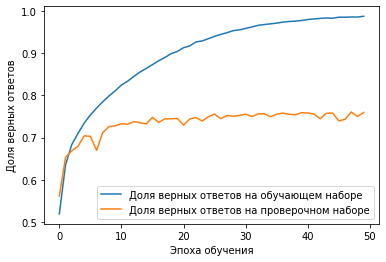

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Conv2d=2 and Dense=2

In [ ]:
#задаем количество Conv2d слоев до Flatten и количество Dense слоев после Flatten
numberConv2dLayers=2
numberDenseLayers=2

In [ ]:
n=20 # bots population size
nsurv=5
nnew=n-nsurv #qty of children
l=len(createRandomNet()) #bot size
epochs=5
mut=0.05
popul=[]

for i in range(n):
  popul.append(createRandomNet())

for it in range(epochs):
  val=[]
  curr_time=time.time()
  for i in range(n):
    bot=popul[i]
    f, model_sum=evaluateNet(bot, 10, 10, 0)
    val.append(f)

  newpopul=[]
  sval=sorted(val, reverse=1)
  for i in range(nsurv):
    index=val.index(sval[i])
    newpopul.append(popul[index])
  print(it, time.time()-curr_time, " ", sval[:5], newpopul[:5])

  for i in range(nnew):
    indexp1=random.randint(0, nsurv-1)
    indexp2=random.randint(0, nsurv-1)
    botp1=newpopul[indexp1]
    botp2=newpopul[indexp2]
    newbot=[]
    net4Mut=createRandomNet()
    for j in range(l):
      x=0
      pindex=random.random()
      if pindex<0.5:
        x=botp1[j]
      else:
        x=botp2[j]

      if random.random()<mut:
        x=net4Mut[j]

      newbot.append(x)
    newpopul.append(newbot)
  popul=newpopul

0 7171.097760677338   [0.4350000023841858, 0.4050000011920929, 0.4000000059604645, 0.4000000059604645, 0.3700000047683716] [[0, 8, 8, 2, 3, 3, 2, 47, 3, 4, 2, 52, 4, 4, 3, 32, 4, 4, 2, 5, 8, 9, 3, 3, 2, 4, 55, 1, 4, 2, 43, 1, 2, 4, 29, 4, 3, 2, 30, 10, 3, 0, 16, 1, 9, 2, 0, 37, 0], [1, 10, 5, 1, 0, 4, 4, 58, 1, 2, 4, 46, 1, 3, 3, 32, 4, 3, 2, 32, 8, 7, 1, 3, 3, 4, 19, 3, 4, 4, 15, 2, 4, 3, 32, 4, 3, 3, 31, 10, 4, 0, 6, 0, 9, 2, 1, 59, 0], [0, 10, 2, 3, 3, 4, 2, 7, 3, 2, 4, 59, 1, 4, 2, 56, 4, 4, 3, 9, 9, 4, 0, 3, 4, 2, 8, 1, 2, 2, 52, 3, 4, 3, 17, 4, 2, 2, 23, 10, 1, 0, 36, 1, 10, 4, 0, 9, 0], [0, 10, 2, 3, 3, 4, 2, 7, 3, 2, 4, 59, 1, 4, 2, 56, 4, 4, 3, 9, 9, 4, 0, 3, 4, 2, 8, 1, 2, 2, 52, 3, 4, 3, 17, 4, 2, 2, 23, 10, 1, 0, 36, 1, 10, 4, 0, 9, 0], [1, 9, 5, 1, 4, 3, 4, 7, 2, 4, 3, 53, 4, 4, 4, 42, 4, 4, 4, 25, 10, 4, 2, 1, 4, 4, 59, 3, 4, 3, 16, 0, 2, 2, 12, 2, 2, 4, 46, 8, 2, 1, 7, 1, 9, 1, 1, 36, 0]]
1 3090.0623276233673   [0.48500001430511475, 0.4650000035762787, 0.4600000083446502

In [ ]:
model_best2=createConvNet(popul[0])
model_best2.summary()

NameError: ignored

In [ ]:
#model_best2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
#history=model_best2.fit(x_train,y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=1)

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

NameError: ignored